# My first project: Shopping Trends

In [ ]:
#!pip install jovian --upgrade --quiet
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

# 1. Defining configuration

Data details: Consumer Behavior and Shopping Habits Dataset

In [1]:
# Importing required library
import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 2. Downloading or uploading csv data

In [3]:
#Data url
#url = 'C:\Users\Sunil kumar\Downloads\shopping_trends.csv'
#Downloading file
#urlretrieve(url, 'shopping_trends.csv') 

!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset')

     |████████████████████████████████| 83 kB 5.3 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 19.6 MB/s            
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=2c0dac8432c83417d7cc75bd153a23f43974d23d4da69bf9ce345cce67e84aaf
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kumarchaitanya1208
Your Kaggle Key: ········


100%|██████████| 146k/146k [00:00<00:00, 197kB/s]

In [4]:
os.listdir('./consumer-behavior-and-shopping-habits-dataset') #Check the downloaded or uploaded file name

['shopping_behavior_updated.csv', 'shopping_trends.csv']

# 3. Reading and understanding the data

> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.

In [5]:
shopping_df = pd.read_csv('consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv') #defining data frame
shopping_df #displaying data 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [7]:
shopping_df.info() #Checking data type and data set details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
shopping_df.describe() #checking numerical values entryies

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
shopping_df.columns #Checking columns names

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [10]:
shopping_df.Category.unique() #Output ares unique value of a column

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [11]:
shopping_df.Category.nunique() # Output are count of unique values of a column

4

In [12]:
shopping_df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
304,305,40,Male,Dress,Clothing,84,Oregon,M,Green,Winter,3.4,Yes,Venmo,Next Day Air,Yes,Yes,45,Credit Card,Bi-Weekly
2464,2465,47,Male,Jacket,Outerwear,84,Hawaii,L,Teal,Winter,2.8,No,Debit Card,Express,No,No,4,Cash,Bi-Weekly
1910,1911,29,Male,Sandals,Footwear,38,New York,S,Yellow,Fall,3.8,No,Venmo,Express,No,No,13,Debit Card,Quarterly
3701,3702,46,Female,Sandals,Footwear,66,New Mexico,M,Charcoal,Spring,4.5,No,Cash,Store Pickup,No,No,36,Cash,Annually
2016,2017,53,Male,Shoes,Footwear,47,Maine,S,Violet,Winter,3.4,No,Credit Card,Standard,No,No,20,Debit Card,Fortnightly
32,33,36,Male,Jacket,Outerwear,67,Kansas,M,Silver,Summer,4.9,Yes,Bank Transfer,Free Shipping,Yes,Yes,37,Venmo,Annually
2681,2682,23,Female,Shoes,Footwear,23,Massachusetts,L,Olive,Summer,4.8,No,Bank Transfer,Standard,No,No,17,Debit Card,Monthly
750,751,25,Male,T-shirt,Clothing,95,Maryland,L,Violet,Fall,3.4,Yes,Bank Transfer,Free Shipping,Yes,Yes,5,Venmo,Annually
3464,3465,36,Female,Coat,Outerwear,59,Utah,S,Peach,Winter,2.7,No,Debit Card,Next Day Air,No,No,12,PayPal,Annually
1971,1972,54,Male,Hat,Accessories,29,Pennsylvania,XL,Indigo,Spring,3.4,No,PayPal,Next Day Air,No,No,1,Venmo,Monthly


In [13]:
shopping_df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [14]:
#To change any data type

#Shopping_df['objecttypecolumnname'] = pd.to_numeric(Shopping_df.objecttypecolumnname, errors='coerce')


# 4. Data Preparation and Cleaning

> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [15]:
# There is nothing to clean

In [16]:
#top 10 rating
shopping_df.sort_values('Review Rating',ascending = False).head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,1665,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,PayPal,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,1278,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Debit Card,Express,Yes,Yes,5,Venmo,Quarterly
2632,2633,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Venmo,Next Day Air,No,No,14,Cash,Annually
965,966,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Debit Card,Store Pickup,Yes,Yes,10,Credit Card,Annually
3554,3555,39,Female,Dress,Clothing,55,Louisiana,M,Indigo,Spring,5.0,No,Bank Transfer,Free Shipping,No,No,5,Credit Card,Fortnightly
3820,3821,34,Female,Belt,Accessories,65,New Hampshire,M,Purple,Winter,5.0,No,Credit Card,Standard,No,No,34,Debit Card,Quarterly
3243,3244,45,Female,Hoodie,Clothing,99,Idaho,L,Black,Summer,5.0,No,Venmo,Store Pickup,No,No,11,Bank Transfer,Every 3 Months
2319,2320,56,Male,Sandals,Footwear,38,Maine,XL,Turquoise,Winter,5.0,No,Debit Card,Free Shipping,No,No,29,PayPal,Monthly
1301,1302,42,Male,Shirt,Clothing,54,Maine,M,Orange,Fall,5.0,No,Venmo,Express,Yes,Yes,21,Debit Card,Weekly


In [ ]:
#top 10 purchage
shopping_df.sort_values('Purchase Amount (USD)', ascending = False).head(10)

In [18]:
# Group by item purchage

shopping_ItemPurchased_df = shopping_df.groupby('Item Purchased')[['Purchase Amount (USD)']].sum()
shopping_ItemPurchased_df

,Purchase Amount (USD)
Item Purchased,
Backpack,8636
Belt,9635
Blouse,10410
Boots,9018
Coat,9275
Dress,10320
Gloves,8477
Handbag,8857
Hat,9375


In [ ]:
#group by Frequency

shopping_frequency_df = shopping_df.groupby('Frequency of Purchases')[['Customer ID']].count()
shopping_frequency_df

In [15]:
shopping_df['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

In [10]:
gender_count=shopping_df.Gender.value_counts() #gender wise customer
gender_count

Male      2652
Female    1248
Name: Gender, dtype: int64

In [23]:
shopping_df['Item Purchased'].value_counts() #Item wise sale

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

In [30]:
shopping_df['Location'].value_counts().head(10)

Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: Location, dtype: int64

# 5. Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

 Top location vs sale

In [16]:
top_location = shopping_df.groupby('Location')[['Purchase Amount (USD)']].sum().sort_values('Purchase Amount (USD)', ascending = False).head(30)
top_location

,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514
Alabama,5261
New York,5257
North Dakota,5220
West Virginia,5174


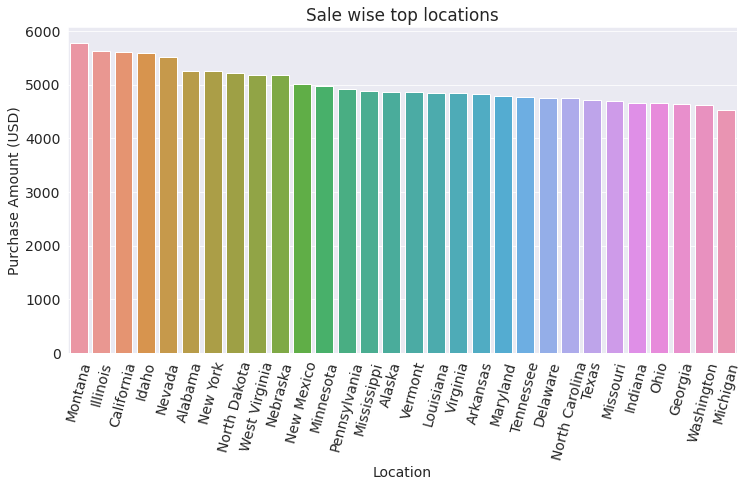

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Sale wise top locations')
sns.barplot(x=top_location.index, y= top_location['Purchase Amount (USD)']);

Age Distribution of customer

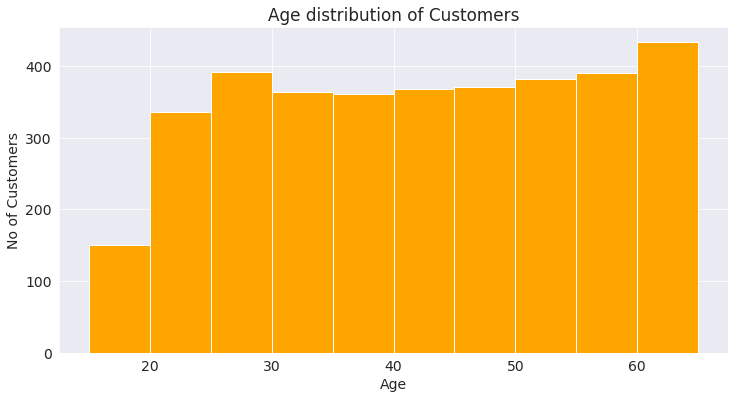

In [13]:
plt.figure(figsize=(12,6))
plt.title('Age distribution of Customers')
plt.xlabel('Age')
plt.ylabel('No of Customers')

plt.hist(shopping_df.Age, bins=np.arange(15,70,5), color='orange');

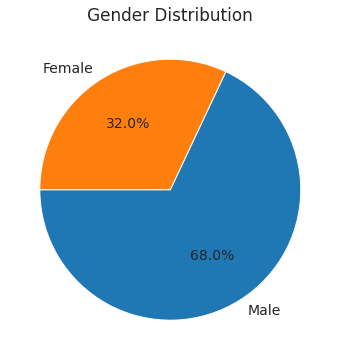

In [23]:
#Pie Chart of gender distribution

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180);

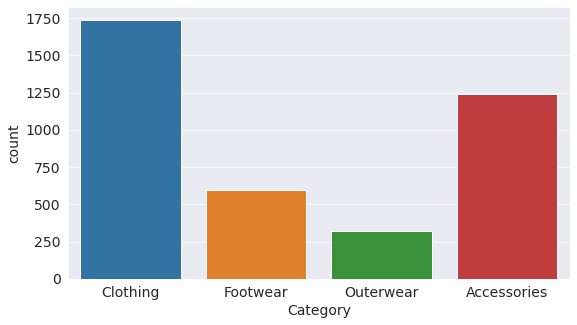

In [25]:
sns.countplot(x=shopping_df.Category);

# 6. Question and Answer

# 7. Inferences and Conclusion